In [1]:
import numpy as np
import pandas as pd

We will import the movies data set by keeping the low_memory = false, as we want to have the whole dataset and avoid any memory related restrictions

In [2]:
movies_df=pd.read_csv("Movie Lens/movie.csv",low_memory=False)
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


We drop genres below as we want to evaluate the output using movieId and title

In [3]:
movies_df.drop("genres",axis=1,inplace=True)
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [4]:
movies_df.shape

(27278, 2)

We will import the ratings data set by keeping the low_memory = false, as we want to have the whole dataset and avoid any memory related restrictions

In [5]:
ratings_df=pd.read_csv("Movie Lens/rating.csv",low_memory=False)
ratings_df

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


We drop timestamp as we are not going to make this recommendation time dependent

In [6]:
ratings_df.drop("timestamp",axis=1,inplace=True)
ratings_df.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [7]:
ratings_df.shape

(20000263, 3)

Here we merge two dataframes on movieid using "inner" method which means only combine those movieids which are present in both the dataframes 

In [8]:
combined_df=pd.merge(movies_df,ratings_df,on="movieId",how="inner")
combined_df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5


In [9]:
combined_df.shape

(20000263, 4)

In [10]:
combined_df.isna().sum()

movieId    0
title      0
userId     0
rating     0
dtype: int64

Renaming columns of the combined dataframe for simplicity

In [11]:
combined_df.rename(columns={"movieId":"movieid","userId":"userid"},inplace=True)

In [12]:
combined_df.head()

,movieid,title,userid,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5


Removing the year part in the title column from every movie title, as no one enters the year while searching for a movie.
As per the year characters, "-6" should have been used but due to the space between movie title and year (for ex - Toy Story" (1995)" contributes to 7 characters) we have to use "-7".

In [13]:
combined_df["title"]=combined_df.title.str[:-7]
combined_df.head()

,movieid,title,userid,rating
0,1,Toy Story,3,4.0
1,1,Toy Story,6,5.0
2,1,Toy Story,8,4.0
3,1,Toy Story,10,4.0
4,1,Toy Story,11,4.5


In [14]:
combined_df.describe()

,movieid,userid,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,9.041567e+03,6.904587e+04,3.525529e+00
std,1.978948e+04,4.003863e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,9.020000e+02,3.439500e+04,3.000000e+00
50%,2.167000e+03,6.914100e+04,3.500000e+00
75%,4.770000e+03,1.036370e+05,4.000000e+00
max,1.312620e+05,1.384930e+05,5.000000e+00


In [15]:
combined_df.movieid.nunique()

26744

Here we get to know what is the total no of ratings for every movie.
Also we make a dataframe out of it

In [16]:
total_rating_count=combined_df.groupby(["title"])["rating"].count().reset_index()
total_rating_count.head()

,title,rating
0,#chicagoGirl: The Social Network Takes on a Di...,3
1,$ (Dollars),24
2,$5 a Day,39
3,$9.99,55
4,$ellebrity (Sellebrity),2


Doing the same thing as above but with movieid, to provide it as input to the plot.

In [17]:
no_of_ratings_for_a_movie = combined_df.groupby('movieid')['rating'].agg('count')
no_of_ratings_for_a_movie.head()

movieid
1    49695
2    22243
3    12735
4     2756
5    12161
Name: rating, dtype: int64

Scatter Plot No 1

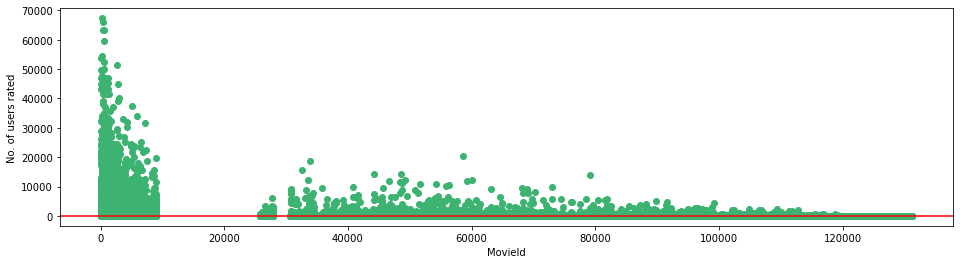

In [18]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_of_ratings_for_a_movie.index,no_of_ratings_for_a_movie,color='mediumseagreen')
plt.axhline(y=100,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users rated')
plt.show()

Renaming rating column to total rating count to avoid confusion in the final dataframe

In [19]:
total_rating_count.rename(columns={"rating":"total_rating_count"},inplace=True)
total_rating_count.head()

,title,total_rating_count
0,#chicagoGirl: The Social Network Takes on a Di...,3
1,$ (Dollars),24
2,$5 a Day,39
3,$9.99,55
4,$ellebrity (Sellebrity),2


Merging dataframes on "title" with respect to left dataframe, that is - combined_df

In [20]:
combined_df_with_total_rating_count=pd.merge(combined_df,total_rating_count,on="title",how="left")

In [21]:
combined_df_with_total_rating_count.head()

,movieid,title,userid,rating,total_rating_count
0,1,Toy Story,3,4.0,49695
1,1,Toy Story,6,5.0,49695
2,1,Toy Story,8,4.0,49695
3,1,Toy Story,10,4.0,49695
4,1,Toy Story,11,4.5,49695


In [22]:
combined_df_with_total_rating_count.movieid.nunique()

26744

The value of rating count is selected by seeing the scatter plot no 1 and then trying if the Nearest Neighbors model gives a meaningful output.

In [23]:
ratingcount=100
ratingcount_more_than_100=combined_df_with_total_rating_count.query("total_rating_count >= @ratingcount")
ratingcount_more_than_100.head()

,movieid,title,userid,rating,total_rating_count
0,1,Toy Story,3,4.0,49695
1,1,Toy Story,6,5.0,49695
2,1,Toy Story,8,4.0,49695
3,1,Toy Story,10,4.0,49695
4,1,Toy Story,11,4.5,49695


In [24]:
ratingcount_more_than_100.movieid.nunique()

9063

Here we get to know how many movies each user has rated.
Also we make a dataframe out of it.

In [25]:
userid_dataset=ratingcount_more_than_100.groupby(["userid"])["rating"].count().reset_index()
userid_dataset.head()

,userid,rating
0,1,174
1,2,61
2,3,187
3,4,28
4,5,66


In [26]:
no_of_movies_a_user_has_rated = ratingcount_more_than_100.groupby('userid')['rating'].agg('count')
no_of_movies_a_user_has_rated.head()

userid
1    174
2     61
3    187
4     28
5     66
Name: rating, dtype: int64

Scatter plot no 2

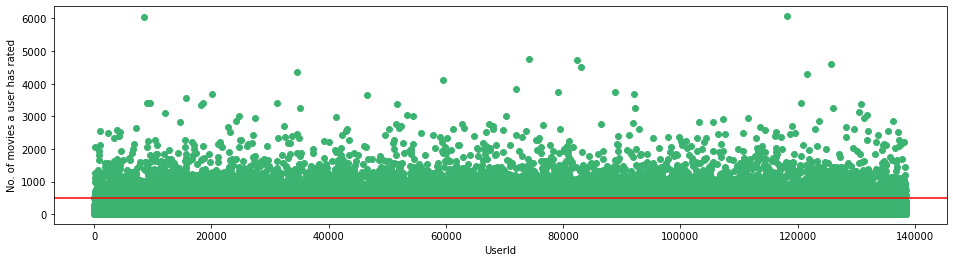

In [27]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_of_movies_a_user_has_rated.index,no_of_movies_a_user_has_rated,color='mediumseagreen')
plt.axhline(y=500,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of movies a user has rated')
plt.show()

Renaming rating column to min movies rated to avoid confusion in the final dataframe

In [28]:
userid_dataset.rename(columns={"rating":"min_movies_rated"},inplace=True)

Merging dataframes on userid with respect to left dataframe.

In [29]:
merged_df=pd.merge(ratingcount_more_than_100,userid_dataset,on="userid",how="left")

In [30]:
merged_df.head()

,movieid,title,userid,rating,total_rating_count,min_movies_rated
0,1,Toy Story,3,4.0,49695,187
1,1,Toy Story,6,5.0,49695,24
2,1,Toy Story,8,4.0,49695,70
3,1,Toy Story,10,4.0,49695,38
4,1,Toy Story,11,4.5,49695,487


In [31]:
merged_df.movieid.nunique()

9063

The value of min movies is selected by seeing the scatter plot no 2 and then trying if the Nearest Neighbors model gives a meaningful output.

In [32]:
min_movies=500
final_df=merged_df.query("min_movies_rated >= @min_movies")
final_df.head()

,movieid,title,userid,rating,total_rating_count,min_movies_rated
12,1,Toy Story,24,4.0,49695,506
18,1,Toy Story,54,4.0,49695,710
19,1,Toy Story,58,5.0,49695,656
27,1,Toy Story,91,4.0,49695,663
37,1,Toy Story,116,3.0,49695,1106


In [33]:
final_df.userid.nunique()

7333

Creating Pivot Table Matrix with index of title, columns of userid, values of rating.

In [34]:
pivot_table_matrix=final_df.pivot_table(index="title",columns="userid",values="rating").fillna(0)
pivot_table_matrix.head()

userid,24,54,58,91,104,116,134,156,208,247,...,138270,138301,138307,138325,138382,138397,138406,138411,138437,138474
title,,,,,,,,,,,,,,,,,,,,,
'Round Midnight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The",0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,4.0
'night Mother,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
pivot_table_matrix.shape

(8329, 7333)

In [36]:
from scipy.sparse import csr_matrix

movies_csr_matrix=csr_matrix(pivot_table_matrix.values)


Using Nearest Neighbors model for Unsupervised learning with cosine metric and brute force algorithm 

In [37]:
from sklearn.neighbors import NearestNeighbors

model_nn= NearestNeighbors(metric="cosine",algorithm="brute")

model_nn.fit(movies_csr_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Test movie for seeing if the model returns meaningful output

In [38]:
movie_name="Tangled"

Here,before giving input to kneighbors function we locate the given movie in the pivot table, then we take only the values(ratings) from it and reshape it according to csr_matrix.

We get output in the form of cosine scores based on distances(less the distance similar the movies) and indices(location of the movie in the dataset) of the movies which are nearest to the Test movie.

In [39]:
distance,indices=model_nn.kneighbors(pivot_table_matrix.loc[movie_name].values.reshape(1,-1), n_neighbors=11)

As we can see here for a movie like "Tangled", the movies which are shown near to it seems meaningful.
As they might have similar genres or actors or directors, which might develop an interest in people\users with similar taste.
As a result, people\users might rate this group of movies similarly, which will make sense in recommending.

In [40]:
for i in range(len(distance.flatten())):
    if i==0:
        print("Movie Recommendations for {0}:\n".format(movie_name))
    else:
        print("{0}:{1}, with a distance of {2}".format(i,pivot_table_matrix.index[indices.flatten()[i]],distance.flatten()[i]))

Movie Recommendations for Tangled:

1:Despicable Me, with a distance of 0.39791056113760814
2:How to Train Your Dragon, with a distance of 0.3991342437583868
3:Toy Story 3, with a distance of 0.42393985172325743
4:Up, with a distance of 0.4525083234487537
5:Brave, with a distance of 0.4530982869204867
6:Megamind, with a distance of 0.4535120467314402
7:Frozen, with a distance of 0.4687567528847669
8:Wreck-It Ralph, with a distance of 0.4730591779883836
9:Harry Potter and the Deathly Hallows: Part 1, with a distance of 0.4786129747705915
10:Harry Potter and the Deathly Hallows: Part 2, with a distance of 0.4819360264745858
